# PRACTICA 3 - HISTOGRAMAS

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

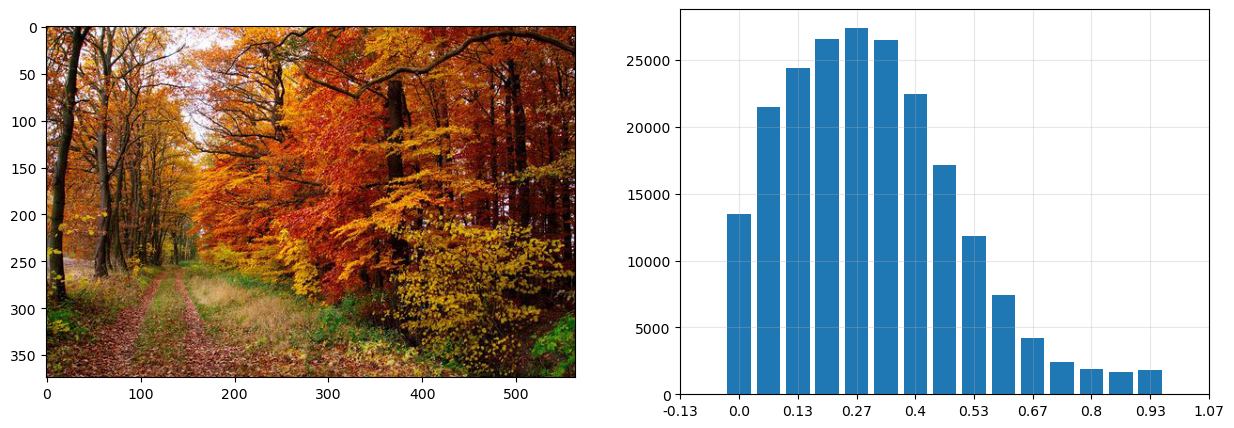

In [145]:
img_rgb = imageio.v2.imread('bosques.jpg')/255

#img_yiq = (apply_matrix(img_rgb, M_YIQ))
#img_yiq[:,:,0] = img_yiq[:,:,0]*2
#img_rgb = apply_matrix(img_yiq, M_RGB)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(np.clip(img_rgb,0,1))
plot_hist(img_rgb, 15, axes[1])

### 1) Normalizar el histograma al rango [0, 1]


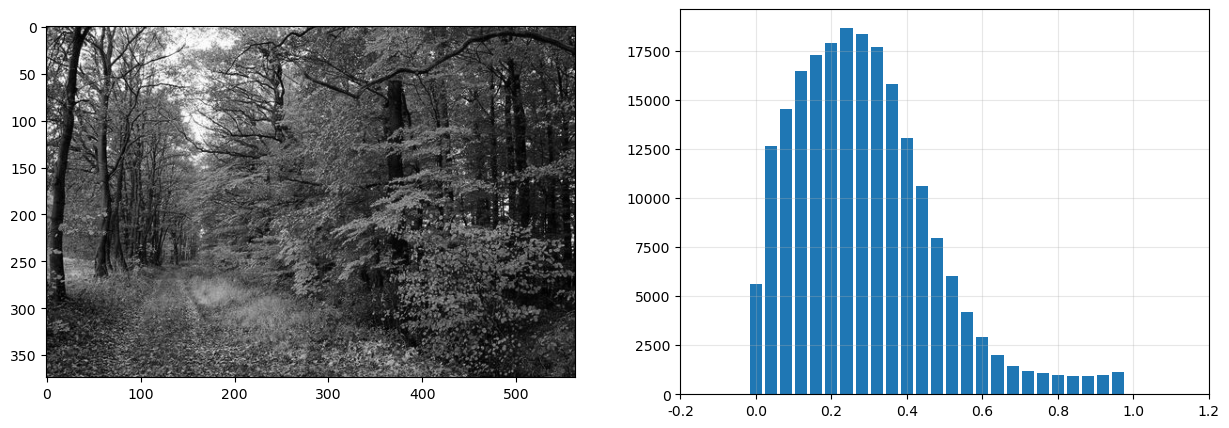

In [172]:
#paso a gris
M = np.ones((3,3))/3
img_gray = apply_matrix(img_rgb, M)

#valores minimos y maximos
min = img_gray.min()
max = img_gray.max()

# inMin = img_rgb.min()
# inMax = img_rgb.max()
# outMin = img_gray.min()
# outMax = img_gray.max()

# Sabiendo el minimo y el máximo, aplicar una funcion que "estire" el historgrama desde 0 a 1.

#y = [{(x-inMin)*(outMax - outMin)} / (inMax - inMin)] + outMin

#y_new = [{(img_gray-inMin)*(outMax - outMin)} / (inMax - inMin)] + outMin

#funcion
y_new = (img_gray - min) / (max - min)

# siendo:a
#        y_new: tu imagen ajustada 
#        y_img: tu imagen de luminancia sin ajustar
#          min: el mínimo valor de luminancia de tu imagen sin ajustar
#          max: el máximo valor de luminancia de tu imagen sin ajustar


fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(np.clip(y_new,0,1))
plot_hist(y_new, 25, axes[1])


### 2) Normalizar el histograma al rango [0, 1] con percentiles. 
##### NOTA: Usar "np.percentile(img, %)"

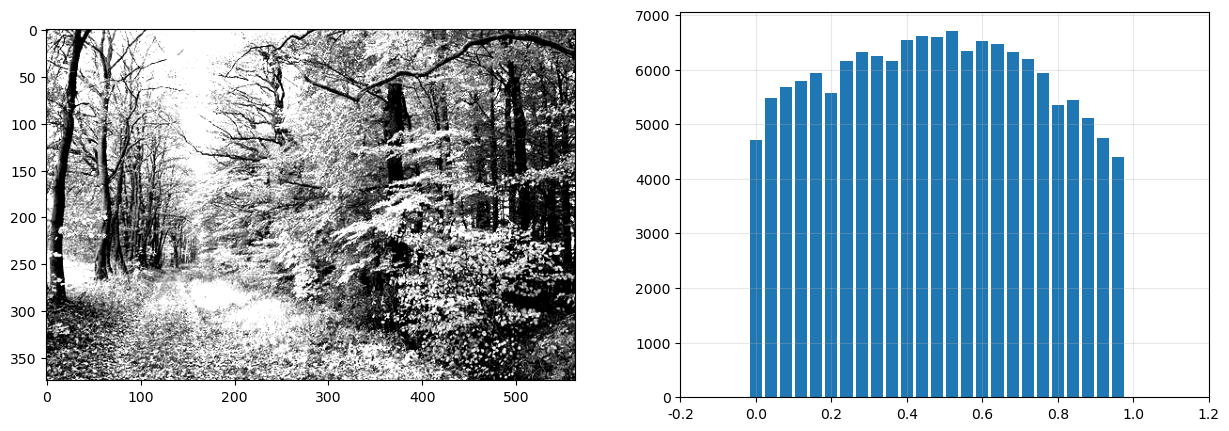

In [168]:
# np.percentile(img_gray,11)

min = np.percentile (img_gray,10)

max = np.percentile (img_gray,80)


y_percen = (img_gray - min) / (max - min)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(np.clip(y_percen,0,1))
plot_hist(y_percen, 25, axes[1])



### 3) Luminancia - Corrección Gamma

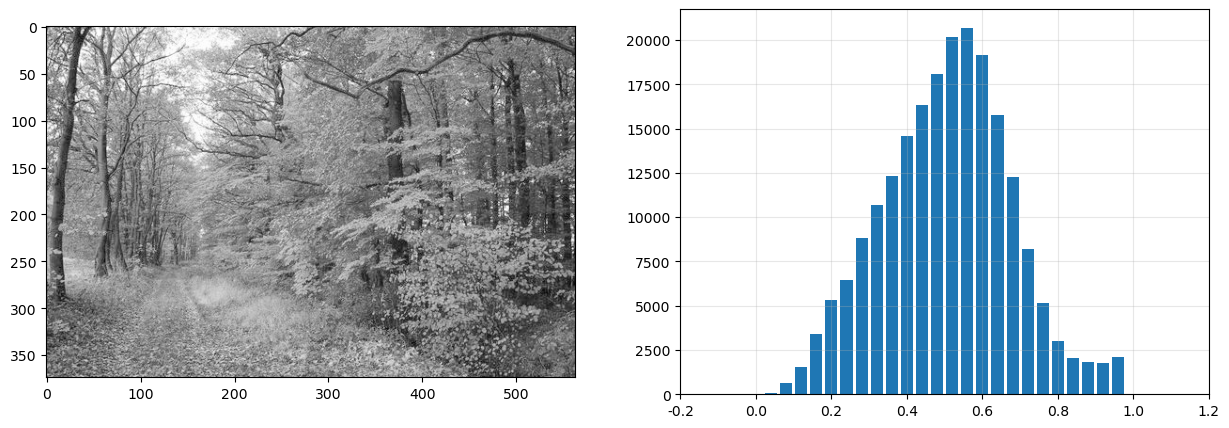

In [170]:
# Definir una función que aplique la corrección gamma a una imagen.
# Normalizar al rango [0, 1] y luego aplicar la correccion gamma.
# y_out = y_in ^ gamma 

y_gamma = img_gray**(1/2)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(np.clip(y_gamma,0,1))
plot_hist(y_gamma, 25, axes[1])

### 4) Funciones

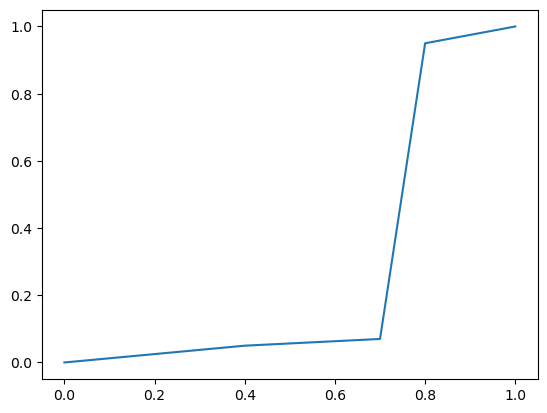

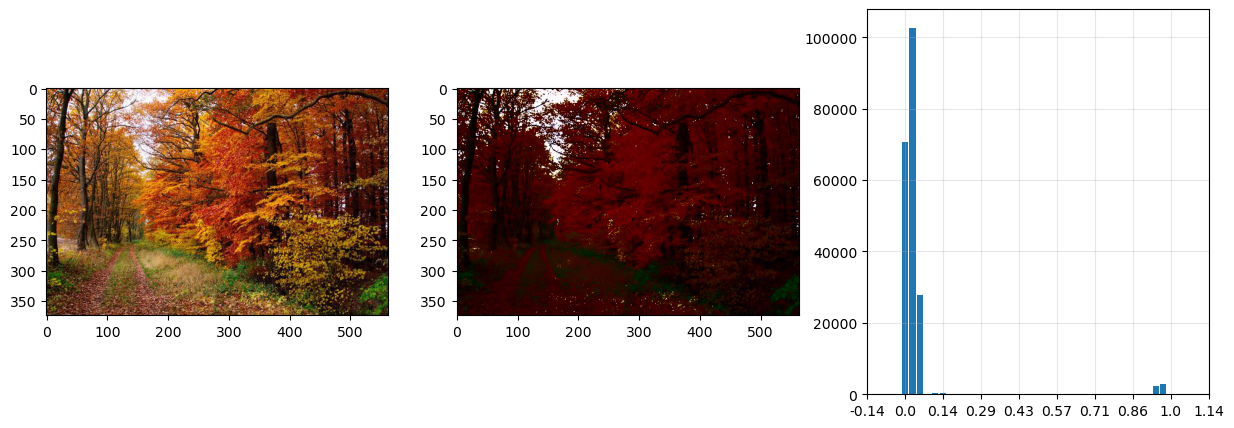

In [171]:
img_yiq = rgb2yiq(img_rgb)
img_yiq_y = img_yiq[:,:,0]
img_yiq_i = img_yiq[:,:,1]
img_yiq_q = img_yiq[:,:,2]

#--------------------------------
#Raiz Cuadrada
#img_yiq_y_mod = np.sqrt(img_yiq_y)
#--------------------------------
#Función cuadrática
#img_yiq_y_mod = np.square(img_yiq_y)
#--------------------------------
#Lineal a trozos
#np.interp()
x = np.array([0, 0.4, 0.7, 0.8,  1]) #[0 ... 1]
y = np.array([0, 0.05, 0.07, 0.95, 1]) #[0 ... 1]
plt.plot(x,y)
img_yiq_y_mod = np.interp(img_yiq_y, x, y)

#--------------------------------

img_yiq_mod = np.zeros(img_rgb.shape)
img_yiq_mod[:,:,0] = img_yiq_y_mod
img_yiq_mod[:,:,1] = img_yiq_i
img_yiq_mod[:,:,2] = img_yiq_q

img_rgb_mod = yiq2rgb(img_yiq_mod)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(np.clip(img_rgb,0,1))
axes[1].imshow(np.clip(img_rgb_mod,0,1))
plot_hist(img_rgb_mod, 35, axes[2])